In [1]:
import pandas as pd
import numpy as np

# Membaca semua dataset F1 yang diperoleh dari Kaggle.com

In [2]:
circuits = pd.read_csv(r'dataset\circuits.csv')
constructor_results = pd.read_csv(r'dataset\constructor_results.csv')
constructor_standings = pd.read_csv(r'dataset\constructor_standings.csv')
constructors = pd.read_csv(r'dataset\constructors.csv')
driver_standings = pd.read_csv(r'dataset\driver_standings.csv')
drivers = pd.read_csv(r'dataset\drivers.csv')
lap_times = pd.read_csv(r'dataset\lap_times.csv')
pit_stops = pd.read_csv(r'dataset\pit_stops.csv')
qualifying = pd.read_csv(r'dataset\qualifying.csv')
races = pd.read_csv(r'dataset\races.csv')
results = pd.read_csv(r'dataset\results.csv')
seasons = pd.read_csv(r'dataset\seasons.csv')
sprint_results = pd.read_csv(r'dataset\sprint_results.csv')
status = pd.read_csv(r'dataset\status.csv')

In [3]:
df1 = pd.merge(races,results,how='inner',on=['raceId'])
df2 = pd.merge(df1,qualifying,how='inner',on=['raceId','driverId','constructorId'])
df3 = pd.merge(df2,drivers,how='inner',on=['driverId'])
df4 = pd.merge(df3,constructors,how='inner',on=['constructorId'])
df = pd.merge(df4,circuits,how='inner',on=['circuitId'])

C:\Users\Nikolas Ermando\AppData\Local\Temp\ipykernel_9976\2916746812.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df4,circuits,how='inner',on=['circuitId'])


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9185 entries, 0 to 9184
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           9185 non-null   int64  
 1   year             9185 non-null   int64  
 2   round            9185 non-null   int64  
 3   circuitId        9185 non-null   int64  
 4   name_x           9185 non-null   object 
 5   date             9185 non-null   object 
 6   time_x           9185 non-null   object 
 7   url_x            9185 non-null   object 
 8   resultId         9185 non-null   int64  
 9   driverId         9185 non-null   int64  
 10  constructorId    9185 non-null   int64  
 11  number_x         9185 non-null   object 
 12  grid             9185 non-null   int64  
 13  position_x       9185 non-null   object 
 14  positionText     9185 non-null   object 
 15  positionOrder    9185 non-null   int64  
 16  points           9185 non-null   float64
 17  laps          

# Hapus kolom yang dinilai tidak berpotensi untuk digunakan dalam machine learning prediksi F1

In [6]:
df = df.drop(['round','circuitId','time_x','url_x','resultId','driverId','constructorId','number_x','positionText','position_y','positionOrder','laps','time_y','rank','fastestLapTime','fastestLapSpeed','qualifyId','driverRef','number','code','url_y','circuitRef','location','lat','lng','alt','number_y','points','constructorRef','name_x','raceId','fastestLap','milliseconds'],axis=1)

In [7]:
df['fullname'] = df['forename'] + " " + df['surname']

In [8]:
df = df.drop(['forename','surname'],axis=1)

In [9]:
df['q1'] = df['q1'].apply(lambda x: np.nan if x == r'\N' else x)
df['q2'] = df['q2'].apply(lambda x: np.nan if x == r'\N' else x)
df['q3'] = df['q3'].apply(lambda x: np.nan if x == r'\N' else x)

In [10]:
def qualifying_status(cols):
    q1 = cols[0]
    q2 = cols[1]
    q3 = cols[2]
    if ((pd.isnull(q1))&(pd.isnull(q2))&(pd.isnull(q3))):
        x = 'Not Qualified'
    else:
        if pd.isnull(q3):
            if pd.isnull(q2):
                x='q1'
            else:
                x='q2'
        else:
            x='q3'
    return x

In [11]:
df['q_status'] = df[['q1','q2','q3']].apply(qualifying_status, axis=1)
df.drop(['q1','q2','q3'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9185 entries, 0 to 9184
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     9185 non-null   int64 
 1   date                     9185 non-null   object
 2   grid                     9185 non-null   int64 
 3   position                 9185 non-null   object
 4   statusId                 9185 non-null   int64 
 5   dob                      9185 non-null   object
 6   driver_nationality       9185 non-null   object
 7   constructor              9185 non-null   object
 8   constructor_nationality  9185 non-null   object
 9   circuit                  9185 non-null   object
 10  country                  9185 non-null   object
 11  fullname                 9185 non-null   object
 12  q_status                 9185 non-null   object
dtypes: int64(3), object(10)
memory usage: 1004.6+ KB


# Melakukan penyesuaian data
Beberapa constructor telah menganti nama maupun dibeli oleh constructor lainnya.

In [13]:
df.rename(columns={'position_x':'position','nationality_x':'driver_nationality',
                   'name_y':'constructor','nationality_y':'constructor_nationality','name':'circuit',
                  },inplace=True)

In [14]:
df['constructor'] = df['constructor'].apply(lambda x:'Mercedes' if x == 'Brawn' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Mercedes' if x == 'BAR' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Alpine F1 Team' if x == 'Renault' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Alpine F1 Team' if x == 'Benetton' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Red Bull' if x == 'Stewart' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Aston Martin' if x == 'Jordan' else x)
df['constructor'] = df['constructor'].apply(lambda x:'AlphaTauri' if x == 'Minardi' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Manor Marussia' if x == 'Virgin' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Manor Marussia' if x == 'Marussia' else x)
df['constructor'] = df['constructor'].apply(lambda x:'AlphaTauri' if x == 'Toro Rosso' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Aston Martin' if x == 'Force India' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Aston Martin' if x == 'Spyker' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Alfa Romeo' if x == 'Sauber' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Alfa Romeo' if x == 'BMW Sauber' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Red Bull' if x == 'Jaguar' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Aston Martin' if x == 'MF1' else x)
df['constructor'] = df['constructor'].apply(lambda x:'AlphaTauri' if x == 'Arrows' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Prost' if x == 'Ligier' else x)
df['constructor'] = df['constructor'].apply(lambda x:'AlphaTauri' if x == 'Footwork' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Aston Martin' if x == 'Racing Point' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Aston Martin' if x == 'Spyker MF1' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Alpine F1 Team' if x == 'Team Lotus' else x)

# Mengklasifikasi status DNF (Do Not Finish) lewat status ID dari race result

In [16]:
df['DNF_status'] = df['statusId'].apply(lambda x:x in [2,5,6,7,8,9,10,21,22,23,24,25,26,30,31,32,34,36,37,38,39,40,42,43,44,48,49,51,54,56,129,60,61,63,66,67,68,69,70,71,72,74,75,76,79,80,84,85,86,87,91,94,95,98,99,101,102,103,104,105,106,108,109,110,126,131,132,135,136])

# Mendapatkan informasi DNF setiap Constructor dan setiap driver yang masih aktif

In [34]:
active_driver = ['Max Verstappen','Charles Leclerc','Carlos Sainz','Sergio Pérez','Kevin Magnussen','Mick Schumacher','Lando Norris','Daniel Ricciardo','Esteban Ocon','Fernando Alonso','Lewis Hamilton','George Russell','Valtteri Bottas','Guanyu Zhou','Yuki Tsunoda','Pierre Gasly','Nicholas Latifi','Alexander Albon','Lance Stroll','Sebastian Vettel']
active_constructor = ['Mercedes','Alpine F1 Team','Williams','McLaren','Ferrari','Red Bull','Aston Martin','Alfa Romeo','AlphaTauri','Haas F1 Team']

In [35]:
constructor_dnf = df[['constructor','DNF_status']].groupby('constructor').mean()
constructor_dnf = constructor_dnf.rename(columns={'DNF_status':'constructor_dnf'}).reset_index()
constructor_dnf = constructor_dnf.sort_values(by='constructor_dnf',ascending=False)
constructor_dnf['active_constructor'] = constructor_dnf['constructor'].apply(lambda x:x in active_constructor)
constructor_dnf = constructor_dnf[constructor_dnf['active_constructor']==1]
constructor_dnf.drop(['active_constructor'],axis=1,inplace=True)

In [37]:
driver_dnf = df[['fullname','DNF_status']].groupby('fullname').mean()
driver_dnf = driver_dnf.rename(columns={'DNF_status':'driver_dnf'}).reset_index()
driver_dnf = driver_dnf.sort_values(by='driver_dnf',ascending=False)
driver_dnf['active_driver'] = driver_dnf['fullname'].apply(lambda x:x in active_driver)
driver_dnf = driver_dnf[driver_dnf['active_driver']==1]
driver_dnf.drop(['active_driver'],axis=1,inplace=True)

In [23]:
import seaborn as sns

<AxesSubplot:xlabel='constructor_dnf', ylabel='constructor'>

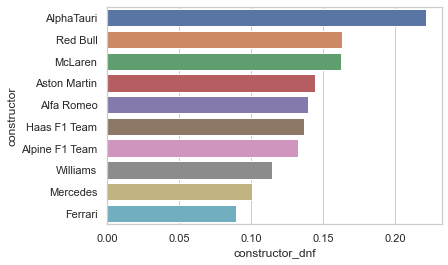

In [36]:
sns.set_theme(style="whitegrid")
sns.barplot(y="constructor", x="constructor_dnf", data=constructor_dnf)

<AxesSubplot:xlabel='driver_dnf', ylabel='fullname'>

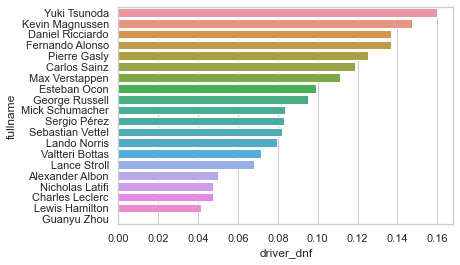

In [38]:
sns.set_theme(style="whitegrid")
sns.barplot(y="fullname", x="driver_dnf", data=driver_dnf)

In [31]:
df = pd.merge(df,constructor_dnf,on='constructor')

In [54]:
df = pd.merge(df,driver_dnf,on='fullname')

In [55]:
df.drop(['DNF_status'],axis=1,inplace=True)

In [57]:
df['active_driver'] = df['fullname'].apply(lambda x:x in active_driver)
df['active_constructor'] = df['constructor'].apply(lambda x:x in active_constructor)

In [58]:
df = df[(df['active_driver']==1) & (df['active_constructor']==1)]

In [59]:
df.drop(['active_driver','active_constructor'],axis=1,inplace=True)

In [60]:
df.reset_index(drop=True)

,year,date,grid,position,statusId,q1,q2,q3,dob,driver_nationality,constructor,constructor_nationality,circuit,country,fullname,q_status,constructor_dnf,driver_dnf
0,2013,17/03/13,3,5,1,1:45.456,1:36.625,1:28.087,1985-01-07,British,Mercedes,German,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237
1,2014,16/03/14,1,\N,5,1:31.699,1:42.890,1:44.231,1985-01-07,British,Mercedes,German,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237
2,2015,15/03/15,1,1,1,1:28.586,1:26.894,1:26.327,1985-01-07,British,Mercedes,German,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237
3,2016,20/03/16,1,2,1,1:25.351,1:24.605,1:23.837,1985-01-07,British,Mercedes,German,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237
4,2017,26/03/17,1,2,1,1:24.191,1:23.251,1:22.188,1985-01-07,British,Mercedes,German,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2021,02/05/21,19,17,12,1:20.452,NaN,NaN,1999-03-22,German,Haas F1 Team,American,Autódromo Internacional do Algarve,Portugal,Mick Schumacher,3,0.136546,0.083333
2516,2021,05/12/21,19,\N,3,1:29.464,NaN,NaN,1999-03-22,German,Haas F1 Team,American,Jeddah Corniche Circuit,Saudi Arabia,Mick Schumacher,3,0.136546,0.083333
2517,2022,27/03/22,0,\N,54,1:30.167,1:29.920,NaN,1999-03-22,German,Haas F1 Team,American,Jeddah Corniche Circuit,Saudi Arabia,Mick Schumacher,2,0.136546,0.083333
2518,2021,21/11/21,19,16,11,1:23.407,NaN,NaN,1999-03-22,German,Haas F1 Team,American,Losail International Circuit,Qatar,Mick Schumacher,3,0.136546,0.083333


In [61]:
df['date']= pd.to_datetime(df['date'])
df['dob']= pd.to_datetime(df['dob'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2520 entries, 865 to 9027
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   year                     2520 non-null   int64         
 1   date                     2520 non-null   datetime64[ns]
 2   grid                     2520 non-null   int64         
 3   position                 2520 non-null   object        
 4   statusId                 2520 non-null   int64         
 5   q1                       2495 non-null   object        
 6   q2                       2109 non-null   object        
 7   q3                       1551 non-null   object        
 8   dob                      2520 non-null   datetime64[ns]
 9   driver_nationality       2520 non-null   object        
 10  constructor              2520 non-null   object        
 11  constructor_nationality  2520 non-null   object        
 12  circuit                  2520 no

In [63]:
df = df.reset_index(drop=True)

In [64]:
df['circuit'].unique()

array(['Albert Park Grand Prix Circuit', 'Sepang International Circuit',
       'Shanghai International Circuit', 'Bahrain International Circuit',
       'Circuit de Barcelona-Catalunya', 'Circuit de Monaco',
       'Istanbul Park', 'Silverstone Circuit', 'Nürburgring',
       'Hungaroring', 'Circuit de Spa-Francorchamps',
       'Autodromo Nazionale di Monza', 'Marina Bay Street Circuit',
       'Suzuka Circuit', 'Autódromo José Carlos Pace',
       'Yas Marina Circuit', 'Circuit Gilles Villeneuve',
       'Hockenheimring', 'Autodromo Enzo e Dino Ferrari',
       'Korean International Circuit', 'Sochi Autodrom',
       'Baku City Circuit', 'Red Bull Ring', 'Circuit of the Americas',
       'Autódromo Hermanos Rodríguez', 'Circuit Paul Ricard',
       'Buddh International Circuit',
       'Autodromo Internazionale del Mugello',
       'Autódromo Internacional do Algarve', 'Jeddah Corniche Circuit',
       'Losail International Circuit', 'Circuit Park Zandvoort',
       'Valencia Street

In [65]:
df['position'] = df['position'].apply(lambda x: '21' if x == r'\N' else x)

In [66]:
df['position'].unique()

array(['5', '21', '1', '2', '4', '3', '7', '12', '6', '9', '15', '10',
       '8', '13', '14', '16', '18', '19', '11', '17', '20', '22'],
      dtype=object)

In [67]:
df['position'] = pd.to_numeric(df['position'])

In [68]:
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'UK' if x == 'British' else x)
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'Germany' if x == 'German' else x)
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'France' if x == 'French' else x)
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'Italy' if x == 'Italian' else x)
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'Austria' if x == 'Austrian' else x)
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'USA' if x == 'American' else x)
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'India' if x == 'Indian' else x)

df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'UK' if x == 'British' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Germany' if x == 'German' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'France' if x == 'French' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Italy' if x == 'Italian' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Austria' if x == 'Austrian' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'USA' if x == 'American' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Monaco' if x == 'Monegasque' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Mexico' if x == 'Mexican' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Netherlands' if x == 'Dutch' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Australia' if x == 'Australian' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Spain' if x == 'Spanish' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Canada' if x == 'Canadian' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Japan' if x == 'Japanese' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'China' if x == 'Chinese' else x)

In [69]:
df['driver_home'] = df['driver_nationality'] == df['country']

In [70]:
df['constructor_home'] = df['constructor_nationality'] == df['country']

In [71]:
df['age_gap'] = df['date'] - df['dob']

In [72]:
df['constructor_nationality'].unique()

array(['Germany', 'UK', 'Swiss', 'France', 'Italy', 'Austria', 'USA',
       'India'], dtype=object)

In [73]:
df['driver_nationality'].unique()

array(['UK', 'Finnish', 'Spain', 'Australia', 'Danish', 'France',
       'Canada', 'Thai', 'Mexico', 'Germany', 'Monaco', 'Netherlands',
       'Japan', 'China'], dtype=object)

In [74]:
df['country'].unique()

array(['Australia', 'Malaysia', 'China', 'Bahrain', 'Spain', 'Monaco',
       'Turkey', 'UK', 'Germany', 'Hungary', 'Belgium', 'Italy',
       'Singapore', 'Japan', 'Brazil', 'UAE', 'Canada', 'Korea', 'Russia',
       'Azerbaijan', 'Austria', 'USA', 'Mexico', 'France', 'India',
       'Portugal', 'Saudi Arabia', 'Qatar', 'Netherlands'], dtype=object)

In [75]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2
df['position'] = df['position'].apply(position_index)

In [76]:
circuit = df['circuit'] + ';' + df['country']
circuit_unique = circuit.unique()
circuit_info = pd.DataFrame(data=circuit_unique,index=range(len(circuit_unique)),columns=['circuit;country'])
circuit_info[['circuit','country']] = circuit_info['circuit;country'].str.split(';', expand=True)
circuit_info.drop(['circuit;country'],axis=1,inplace=True)

In [77]:
driver = df['fullname'] + ';' + df['driver_nationality'] + ';' + df['dob'].astype(str) + ';' + df['driver_dnf'].astype(str)
driver_unique = driver.unique()
driver_info = pd.DataFrame(data=driver_unique,index=range(len(driver_unique)),columns=['fullname;driver_nationality;dob;driver_dnf'])
driver_info[['fullname','driver_nationality','dob','driver_dnf']] = driver_info['fullname;driver_nationality;dob;driver_dnf'].str.split(';', expand=True)
driver_info.drop(['fullname;driver_nationality;dob;driver_dnf'],axis=1,inplace=True)
driver_info['dob'] = pd.to_datetime(driver_info['dob'])
driver_info['driver_dnf'] = pd.to_numeric(driver_info['driver_dnf'])

In [78]:
constructor = df['constructor'] + ';' + df['constructor_nationality'] + ';' + df['constructor_dnf'].astype(str)
constructor_unique = constructor.unique()
constructor_info = pd.DataFrame(data=constructor_unique,index=range(len(constructor_unique)),columns=['constructor;constructor_nationality;constructor_dnf'])
constructor_info[['constructor','constructor_nationality','constructor_dnf']] = constructor_info['constructor;constructor_nationality;constructor_dnf'].str.split(';', expand=True)
constructor_info.drop(['constructor;constructor_nationality;constructor_dnf'],axis=1,inplace=True)
constructor_info['constructor_dnf'] = pd.to_numeric(constructor_info['constructor_dnf'])
constructor_info = constructor_info.drop(index=[9,11]).reset_index(drop=True)

In [79]:
df["age_gap"] = df["age_gap"].astype("int64")

In [80]:
import seaborn as sns

In [83]:
df.head()

,year,date,grid,position,statusId,q1,q2,q3,dob,driver_nationality,...,constructor_nationality,circuit,country,fullname,q_status,constructor_dnf,driver_dnf,driver_home,constructor_home,age_gap
0,2013,2013-03-17,3,2,1,1:45.456,1:36.625,1:28.087,1985-01-07,UK,...,Germany,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237,False,False,889574400000000000
1,2014,2014-03-16,1,3,5,1:31.699,1:42.890,1:44.231,1985-01-07,UK,...,Germany,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237,False,False,921024000000000000
2,2015,2015-03-15,1,1,1,1:28.586,1:26.894,1:26.327,1985-01-07,UK,...,Germany,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237,False,False,952473600000000000
3,2016,2016-03-20,1,1,1,1:25.351,1:24.605,1:23.837,1985-01-07,UK,...,Germany,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237,False,False,984528000000000000
4,2017,2017-03-26,1,1,1,1:24.191,1:23.251,1:22.188,1985-01-07,UK,...,Germany,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237,False,False,1016582400000000000


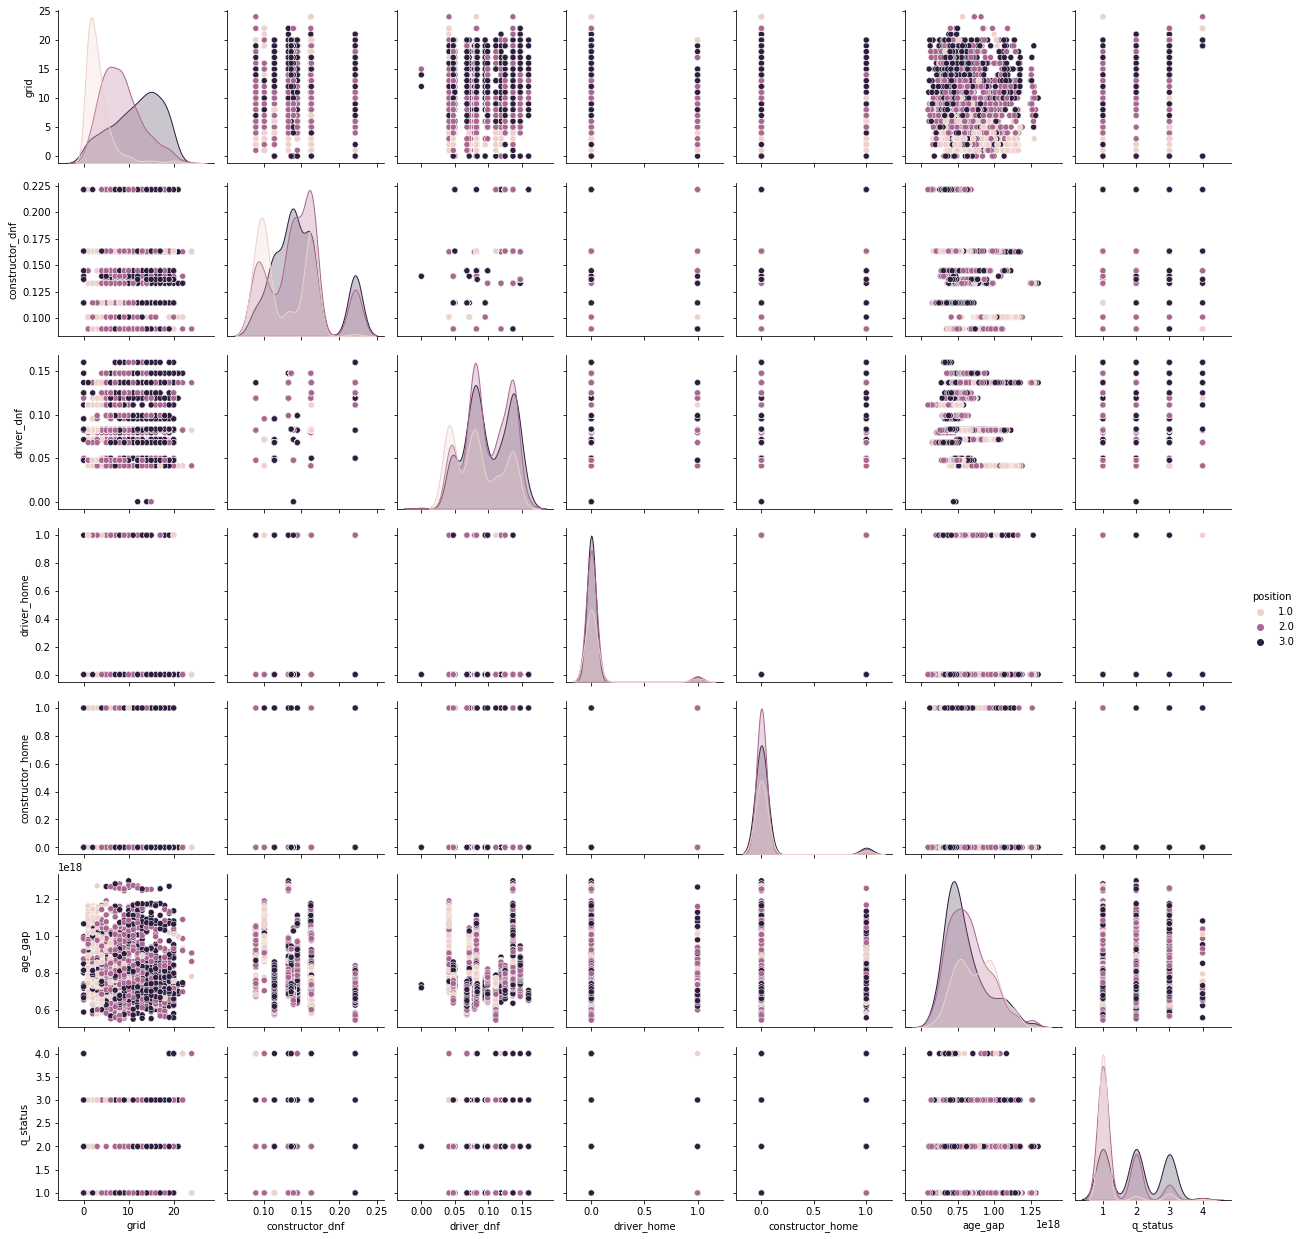

In [84]:
sns.pairplot(df[['grid','position','constructor_dnf','driver_dnf','driver_home','constructor_home','age_gap','q_status']].astype(float),hue='position')

In [85]:
modelling_data = df[['grid','position','constructor','circuit','fullname','constructor_dnf','driver_dnf','driver_home','constructor_home','age_gap','q_status']]

In [86]:
modelling_data = pd.get_dummies(modelling_data, columns=['circuit','fullname','constructor'])

In [87]:
modelling_data.drop(['circuit_A1-Ring','fullname_Alexander Albon','constructor_Alfa Romeo'],axis=1,inplace=True)

In [88]:
modelling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   grid                                          2520 non-null   int64  
 1   position                                      2520 non-null   int64  
 2   constructor_dnf                               2520 non-null   float64
 3   driver_dnf                                    2520 non-null   float64
 4   driver_home                                   2520 non-null   bool   
 5   constructor_home                              2520 non-null   bool   
 6   age_gap                                       2520 non-null   int64  
 7   q_status                                      2520 non-null   int64  
 8   circuit_Albert Park Grand Prix Circuit        2520 non-null   uint8  
 9   circuit_Autodromo Enzo e Dino Ferrari         2520 non-null   u

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [90]:
X = modelling_data.drop(['position'],axis=1)
y = modelling_data['position']
X['age_gap'] = X['age_gap'].apply(lambda x:x//31536000000000000)

se = StandardScaler()
le = LabelEncoder()
X['circuit'] = le.fit_transform(X['circuit'])
X['fullname'] = le.fit_transform(X['fullname'])
X['constructor'] = le.fit_transform(X['constructor'])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [93]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB']
model_dict = dict(zip(models,names))
mean_results = []
results = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    result = cross_val_score(model,X,y,cv=cv,scoring='accuracy')
    mean_results.append(result.mean())
    results.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

C:\Users\Nikolas Ermando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nikolas Ermando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

LogisticRegression : 0.6178571428571429
DecisionTreeClassifier : 0.5428571428571428
RandomForestClassifier : 0.6015873015873017
SVC : 0.6242063492063492
GaussianNB : 0.4615079365079365


In [95]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
preds = LR.predict(X_test)

print(classification_report(preds,y_test))
print(confusion_matrix(preds,y_test))
print(LR.score(X_test,y_test))

              precision    recall  f1-score   support

           1       0.78      0.58      0.67       255
           2       0.47      0.51      0.49       290
           3       0.55      0.62      0.58       287

    accuracy                           0.57       832
   macro avg       0.60      0.57      0.58       832
weighted avg       0.59      0.57      0.58       832

[[149  68  38]
 [ 33 149 108]
 [  8 102 177]]
0.5709134615384616


C:\Users\Nikolas Ermando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results

In [ ]:
X

<AxesSubplot:>

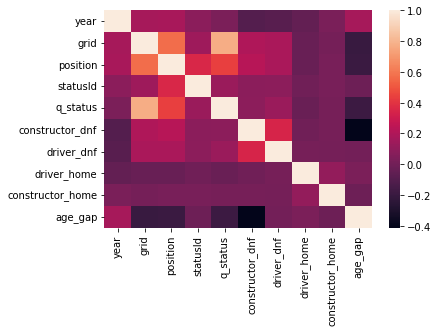

In [94]:
sns.heatmap(df.corr())